In [50]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

import cv2

%matplotlib inline

In [2]:
num_classes = 7
classes = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
batch_size = 256
epochs = 50
height, width = 128, 128

In [4]:
with open("../data/raw/facial_expression/data.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [47]:
d_emotions_count = dict()
for i in range(1, len(lines)):
    if classes[int(lines[i].split(",")[0])] in d_emotions_count.keys():
        d_emotions_count[classes[int(lines[i].split(",")[0])]] += 1
    else:
        d_emotions_count[classes[int(lines[i].split(",")[0])]] = 1

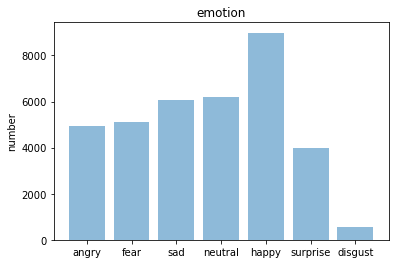

In [61]:
a = list(d_emotions_count.keys())
b = list(d_emotions_count.values())
y_pos = np.arange(len(a))
plt.bar(y_pos, b, align='center', alpha=0.5)
plt.xticks(y_pos, a)
plt.ylabel('number')
plt.title('emotion')
plt.show()

In [62]:
    init = tf.contrib.layers.xavier_initializer()
    with tf.variable_scope():
        conv1 = tf.layers.conv2d(inputs=images, filters=64, kernel_size=5, strides=1, padding="VALID", kernel_initializer=init)
        relu1 = tf.nn.relu(conv1)
        conv2 = tf.layers.conv2d(inputs=relu1, filters=64, kernel_size=5, strides=1, padding="VALID", kernel_initializer=init)
        bn2 = tf.layers.batch_normalization(inputs=conv2, training=True)
        relu2 = tf.nn.relu(bn2)
        pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        conv3 = tf.layers.conv2d(inputs=pool2, filters=128, kernel_size=3, strides=2, padding="VALID", kernel_initializer=init)
        relu3 = tf.nn.relu(conv3)
        conv4 = tf.layers.conv2d(inputs=relu3, filters=128, kernel_size=3, strides=2, padding="VALID", kernel_initializer=init)
        bn4 = tf.layers.batch_normalization(inputs=conv4, training=True)
        relu4 = tf.nn.relu(bn4)
        pool4 = tf.nn.avg_pool(relu4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
        conv5 = tf.layers.conv2d(inputs=pool4, filters=128, kernel_size=3, strides=2, padding="VALID", kernel_initializer=init)
        relu5 = tf.nn.relu(conv5)
        conv6 = tf.layers.conv2d(inputs=relu5, filters=128, kernel_size=3, strides=2, padding="VALID", kernel_initializer=init)
        bn6 = tf.layers.batch_normalization(inputs=conv6, training=True)
        relu6 = tf.nn.relu(bn6)
        pool6 = tf.nn.avg_pool(relu6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        shape = (-1, len(clases))
        flat = tf.reshape(tensor=pool6, shape=shape)
        logits = tf.layers.dense(inputs=flat, units=1024)
        out = tf.nn.softmax(logits)

TypeError: __init__() missing 1 required positional argument: 'name_or_scope'

In [ ]:
        with tf.variable_scope(name_or_scope="discriminator", reuse=reuse):
            # Block 1 featuring
            conv1 = tf.layers.conv2d(inputs=images, filters=64, kernel_size=5, strides=2, padding="same", kernel_initializer=init)
            relu1 = tf.maximum(conv1 * self.alpha, conv1)

            # Block 2 featuring
            conv2 = tf.layers.conv2d(inputs=relu1, filters=128, kernel_size=5, strides=2, padding="same", kernel_initializer=init)
            # Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
            bn2 = tf.layers.batch_normalization(inputs=conv2, training=True)
            relu2 = tf.maximum(bn2 * self.alpha, bn2)
            drop2 = tf.nn.dropout(x=relu2, keep_prob=.8)

            # Block 3 featuring
            conv3 = tf.layers.conv2d(inputs=drop2, filters=256, kernel_size=5, strides=2, padding="same", kernel_initializer=init)
            bn3 = tf.layers.batch_normalization(inputs=conv3, training=True)
            relu3 = tf.maximum(bn3 * self.alpha, bn3)
            drop3 = tf.nn.dropout(x=relu3, keep_prob=.8)

            # Last Block prediction
            shape = (-1, self.out_shape)
            flat = tf.reshape(tensor=drop3, shape=shape)
            logits = tf.layers.dense(inputs=flat, units=1)  # units: dimensionality of the output space.
            out = tf.sigmoid(logits)

            return logits, out

In [ ]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()